In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.manifold import TSNE

In [9]:
rep_csv = pd.read_csv('../../input/means.treatment.profiles', sep='\t')
moa_csv = pd.read_csv('../../input/BBBC021_v1_moa.csv')

unique_moas = moa_csv['moa'].drop_duplicates()
unique_moas.sort_values(inplace=True)

#print rep_csv.columns
#print moa_csv.columns

In [10]:
combined = pd.merge(rep_csv, moa_csv,
                    how='inner',
                    left_on=('Compound',
                             'Concentration'),
                    right_on=('compound', 'concentration'))
print combined.head()

        Compound  Concentration  Nuclei_AreaShape_Area  \
0           AZ-A           30.0               0.615953   
1  latrunculin B            1.0               0.492935   
2          taxol            3.0               0.422150   
3         MG-132            0.1               0.452675   
4  cyclohexamide           15.0               0.577858   

   Nuclei_AreaShape_Eccentricity  Nuclei_AreaShape_Solidity  \
0                       0.654390                   0.702624   
1                       0.677154                   0.744287   
2                       0.698976                   0.620763   
3                       0.651417                   0.773194   
4                       0.658585                   0.743703   

   Nuclei_AreaShape_Extent  Nuclei_AreaShape_Perimeter  \
0                 0.569577                    0.654887   
1                 0.604080                    0.527487   
2                 0.497550                    0.510859   
3                 0.621362              

In [4]:
print combined.iloc[:, 3:-3].head()
combined.iloc[:, 3:-3].shape

   Nuclei_AreaShape_Eccentricity  Nuclei_AreaShape_Solidity  \
0                       0.654390                   0.702624   
1                       0.677154                   0.744287   
2                       0.698976                   0.620763   
3                       0.651417                   0.773194   
4                       0.658585                   0.743703   

   Nuclei_AreaShape_Extent  Nuclei_AreaShape_Perimeter  \
0                 0.569577                    0.654887   
1                 0.604080                    0.527487   
2                 0.497550                    0.510859   
3                 0.621362                    0.485754   
4                 0.593923                    0.611422   

   Nuclei_AreaShape_FormFactor  Nuclei_AreaShape_MajorAxisLength  \
0                     0.558901                          0.624915   
1                     0.619838                          0.537681   
2                     0.471613                          0.481398   


(103, 96)

In [5]:
model = TSNE(n_components=2, random_state=0)
reps = model.fit_transform(combined.iloc[:, 3:-3])

In [11]:
print reps.shape

(905, 2)


In [6]:
tsne_reps = pd.DataFrame(columns=['moa', 'x', 'y'])
tsne_reps['moa'] = combined['moa']
tsne_reps[['x', 'y']] = reps

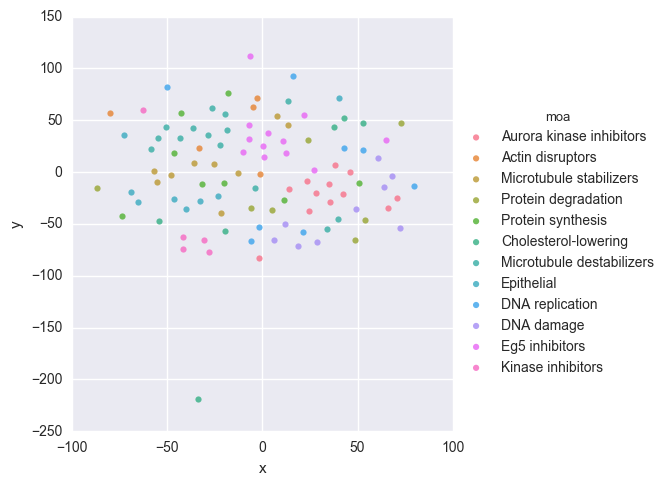

In [7]:
sns.lmplot(x="x", y="y", hue="moa", data=tsne_reps,
           fit_reg=False, legend_out=True, legend=True)
plt.show()

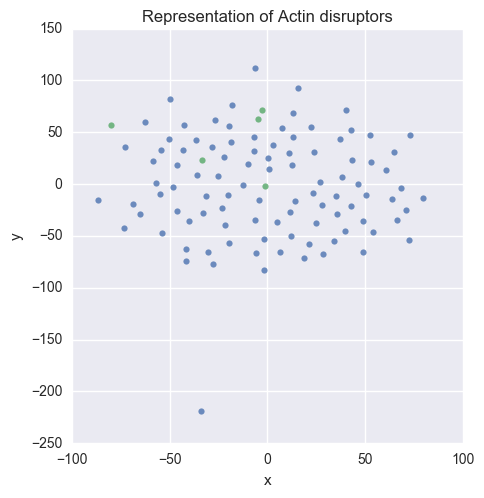

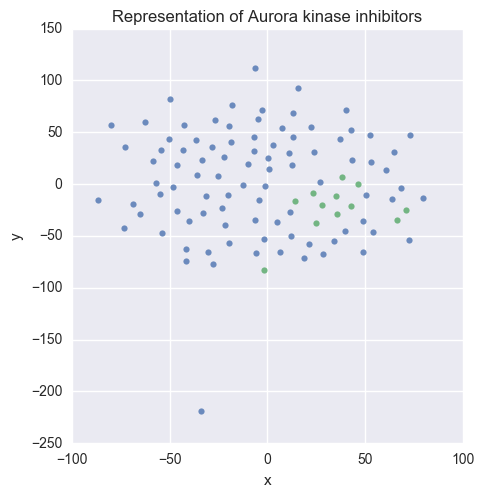

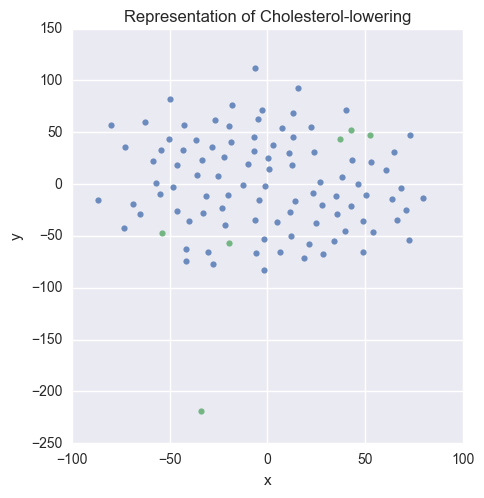

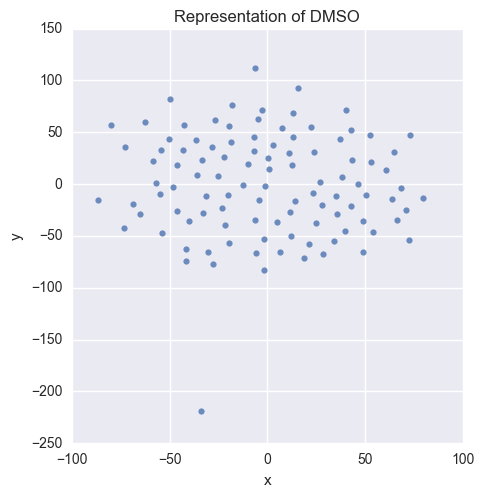

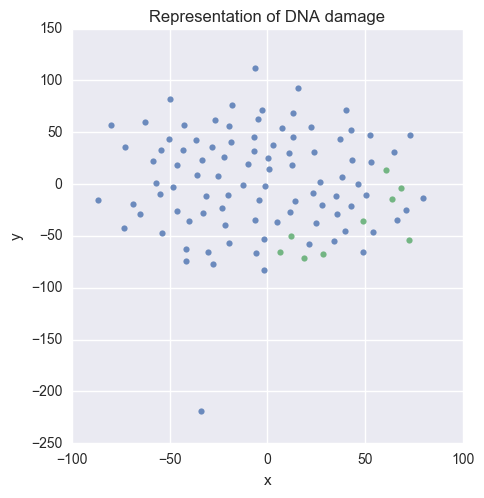

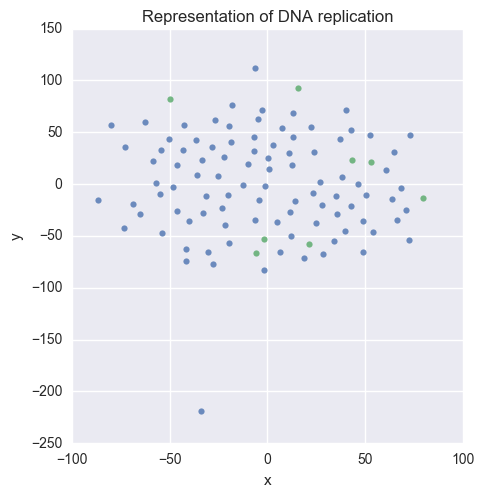

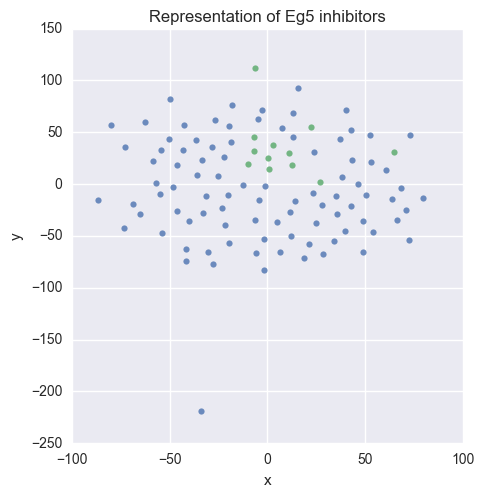

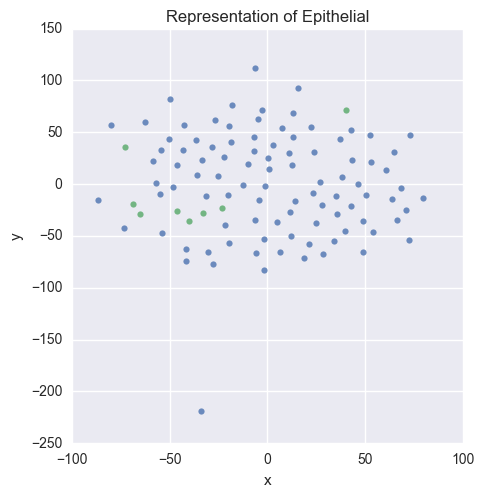

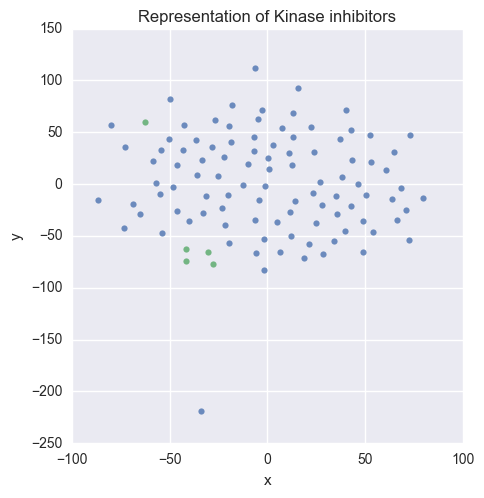

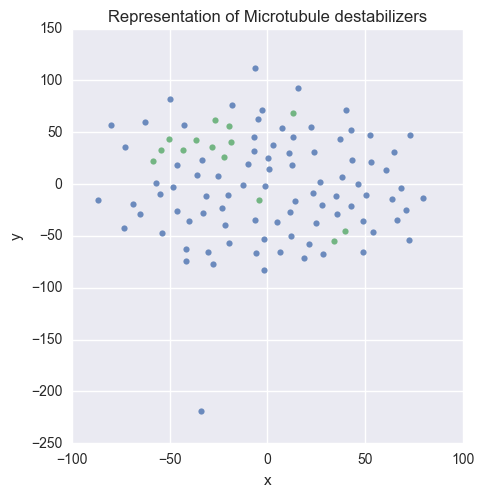

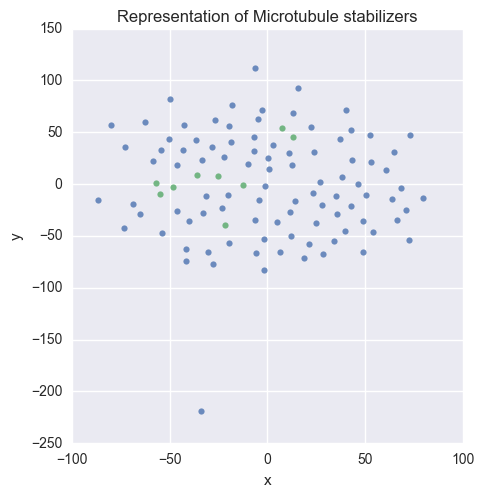

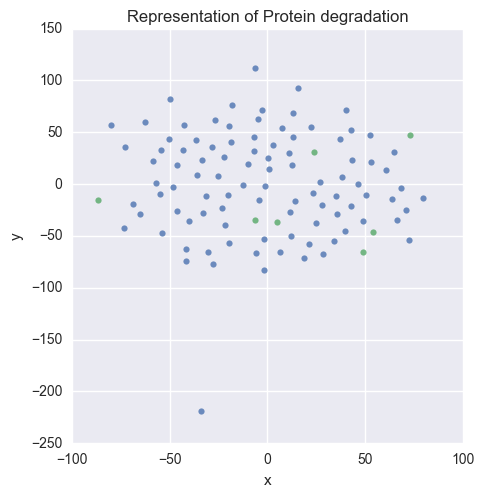

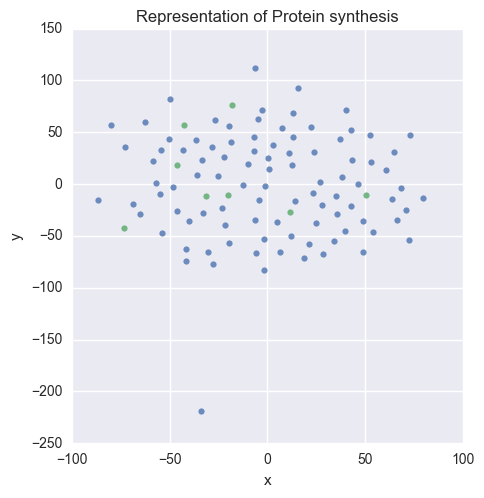

In [11]:
for moa in unique_moas:
    tsne_reps['hue'] = 0
    tsne_reps.loc[tsne_reps['moa'] == moa, 'hue'] = 1
    sns.lmplot(x="x", y="y", hue="hue", data=tsne_reps,
               fit_reg=False, legend=False)
    plt.title('Representation of %s' % moa)
    plt.show()

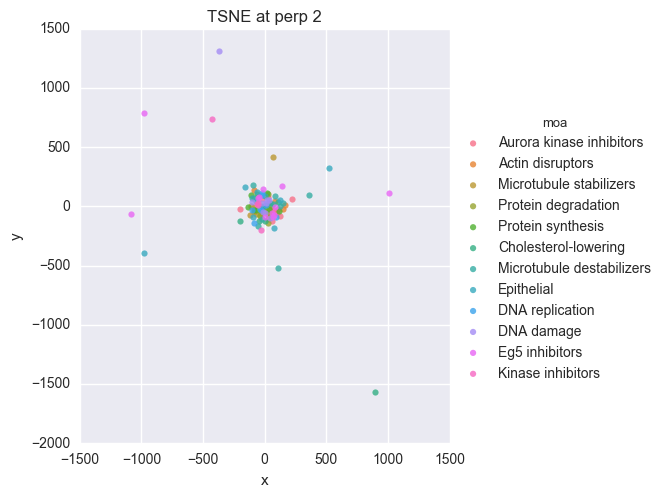

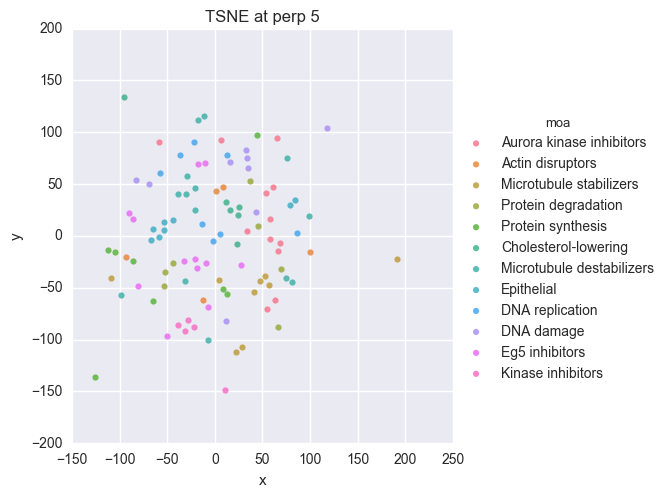

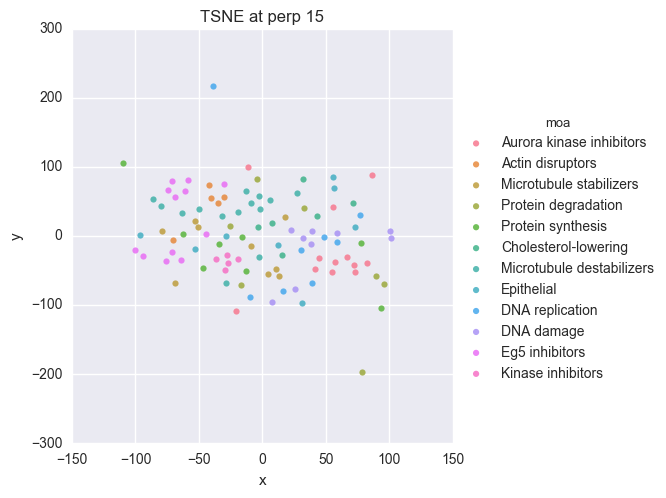

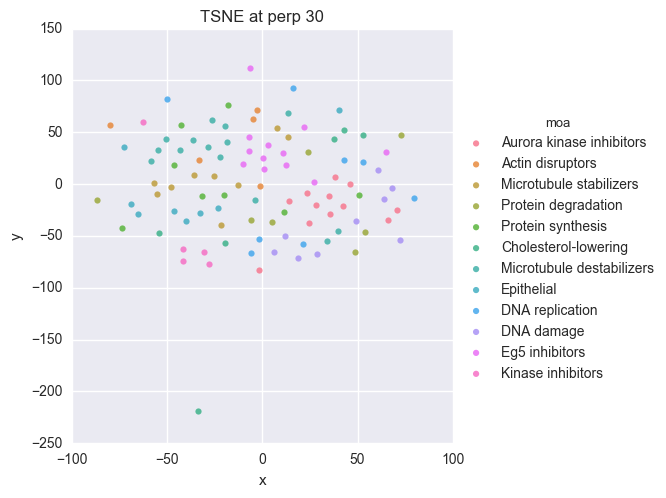

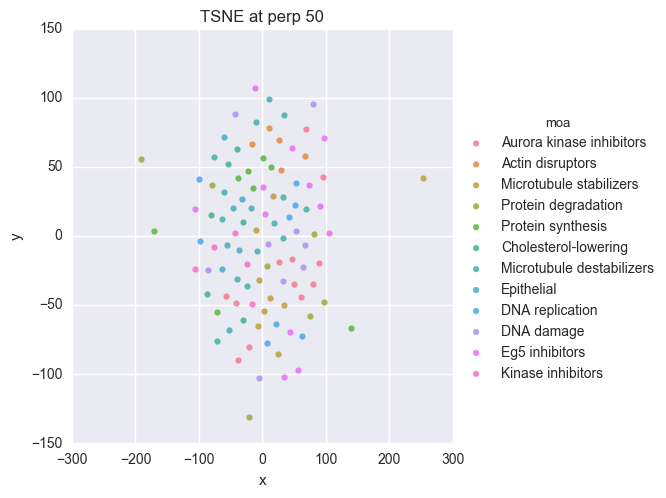

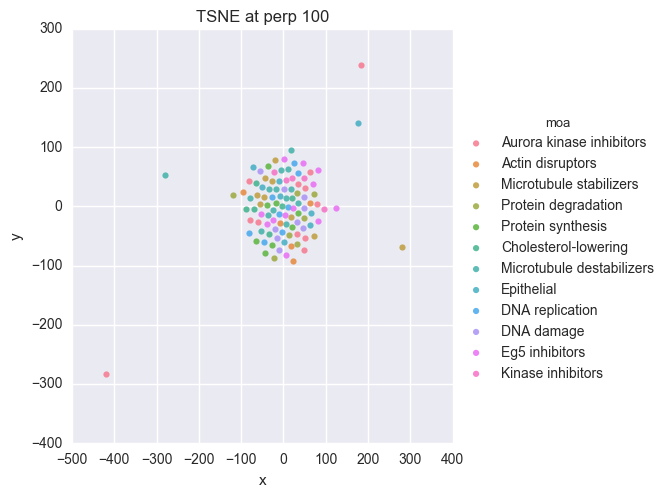

In [14]:
for perp in [2, 5, 15, 30, 50, 100]:
    model = TSNE(n_components=2, random_state=0, perplexity=perp)
    reps = model.fit_transform(combined.iloc[:, 3:-3])
    tsne_reps = pd.DataFrame(columns=['moa', 'x', 'y'])
    tsne_reps['moa'] = combined['moa']
    tsne_reps[['x', 'y']] = reps
    sns.lmplot(x="x", y="y", hue="moa", data=tsne_reps,
           fit_reg=False, legend_out=True, legend=True)
    plt.title('TSNE at perp %d' % perp)
    plt.show()

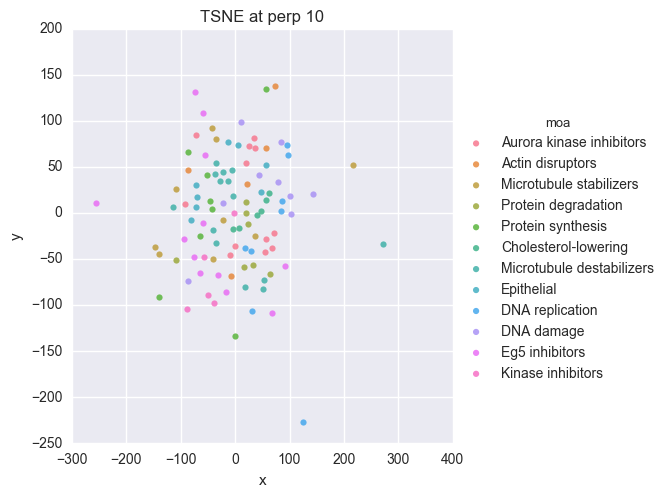

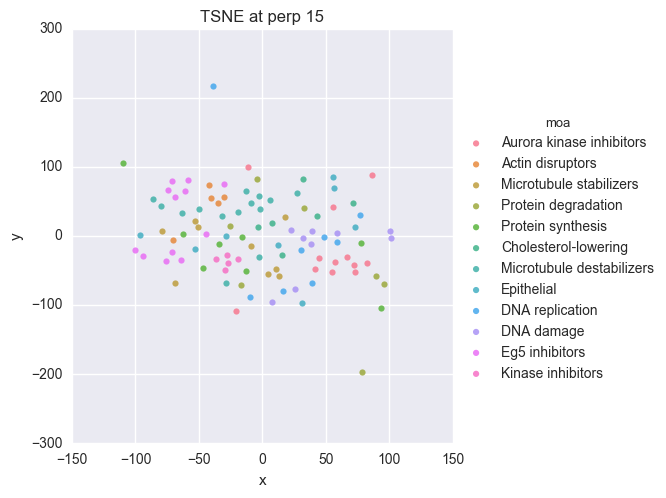

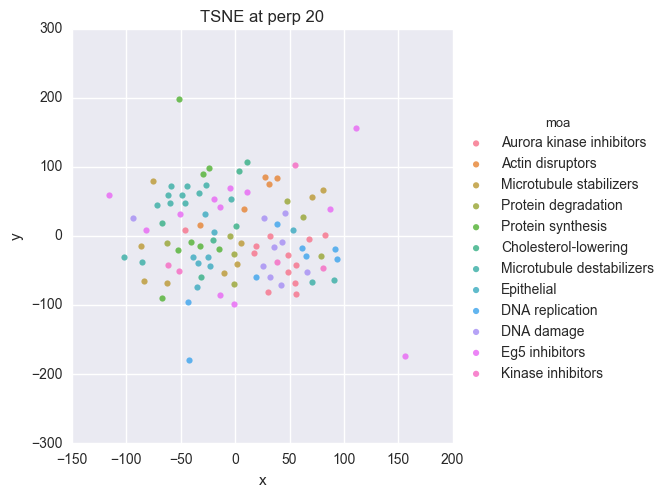

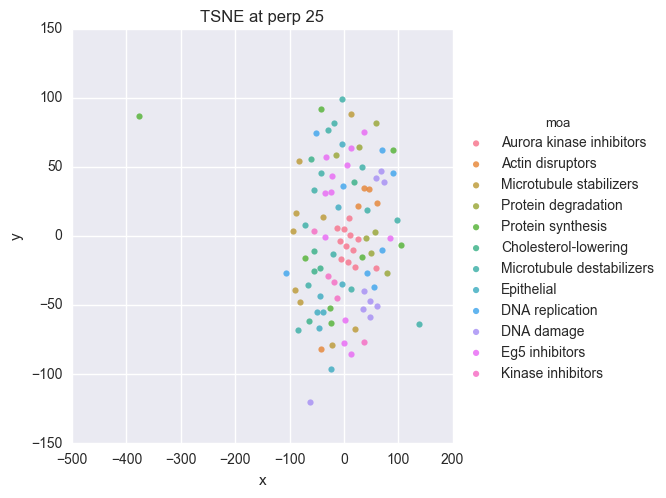

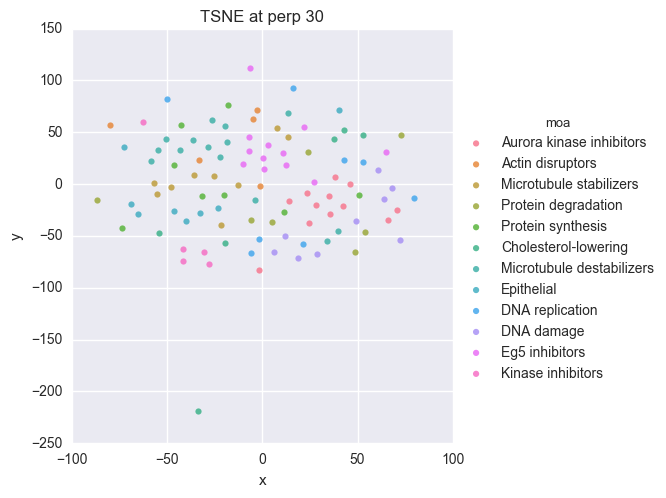

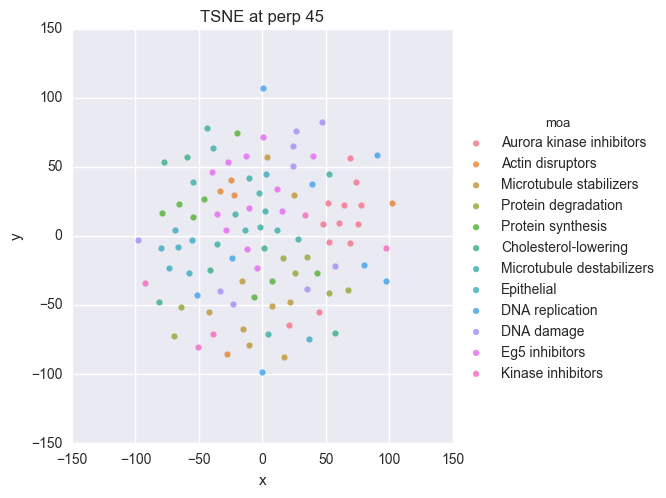

In [15]:
for perp in [10, 15, 20, 25, 30, 45]:
    model = TSNE(n_components=2, random_state=0, perplexity=perp)
    reps = model.fit_transform(combined.iloc[:, 3:-3])
    tsne_reps = pd.DataFrame(columns=['moa', 'x', 'y'])
    tsne_reps['moa'] = combined['moa']
    tsne_reps[['x', 'y']] = reps
    sns.lmplot(x="x", y="y", hue="moa", data=tsne_reps,
           fit_reg=False, legend_out=True, legend=True)
    plt.title('TSNE at perp %d' % perp)
    plt.show()